# Desafio - EDA

Com base no módulo de Análise Exploratória de Dados, deve-se analisar o seguinte conjunto de dados disponível no link:

[Ranking Netflix](https://efficient-sloth-d85.notion.site/signed/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F08f749ff-d06d-49a8-a488-9846e081b224%2F2dc4ff7c-99f5-4b66-84ba-5c8714c90623%2Fnetflix_daily_top_10.csv?table=block&id=f028d311-1226-479d-89d2-8d7b38302567&spaceId=08f749ff-d06d-49a8-a488-9846e081b224&name=netflix%20daily%20top%2010.csv&cache=v2)

Este conjunto de dados contém informações sobre os filmes e séries mais populares do Netflix em um determinado período.

O objetivo deste desafio é analisar e extrair as informações:

- Tipos de dados disponíveis
- Período da análise feita
- Tamanho da base de dados
- Verificar dados nulos
- Outliers

In [1]:
# Importa pacotes de sistema

import os

In [ ]:
# Pacotes e bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

/home/jakunzler/.local/share/virtualenvs/analise_exploratoria-mLN5YKDd/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Carregando os dados

In [3]:
# Usa-se a função pd.read_csv() para carregar o arquivo csv
path_to_file = os.path.join("dataset", "netflix_daily_top_10.csv")

df = pd.read_csv(path_to_file)

In [4]:
# Exibe as primeiras linhas do dataframe
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [ ]:
# Exibe as últimas linhas do dataframe
df.tail()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


## Procedimentos para atender os critérios do desafio

Deve-se apresentar:

- Tipos de dados disponíveis
- Período da análise feita
- Tamanho da base de dados
- Verificar dados nulos
- Outliers

### Tipos de dados disponíveis

In [6]:
# Obter tipos de dados disponíveis para as colunas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [7]:
# Verificar o período em que os dados foram armazenados
date_column = pd.to_datetime(df['As of'])
date_column.dt.strftime("%Y-%m-%d")

0       2020-04-01
1       2020-04-01
2       2020-04-01
3       2020-04-01
4       2020-04-01
           ...    
7095    2022-03-11
7096    2022-03-11
7097    2022-03-11
7098    2022-03-11
7099    2022-03-11
Name: As of, Length: 7100, dtype: object

In [8]:
# Obtendo o período de análise
oldest_record = date_column.min()
newest_record = date_column.max()

print(f"Período de análise: {oldest_record.strftime('%Y-%m-%d')} a {newest_record.strftime('%Y-%m-%d')}")

Período de análise: 2020-04-01 a 2022-03-11


In [9]:
# Verificar o tamanho da base de dados
print(df.shape)
# Verificar dados nulos
print(df.isnull().sum())
# Verificar dados NaN
print(df.isna().sum())

(7100, 10)
As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64
As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64


In [10]:
# Verificar outliers
df.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


<Axes: ylabel='Frequency'>

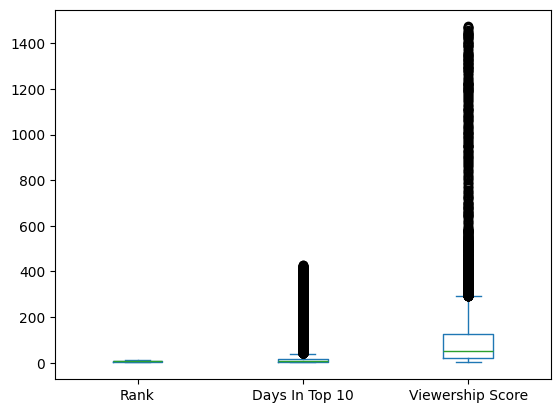

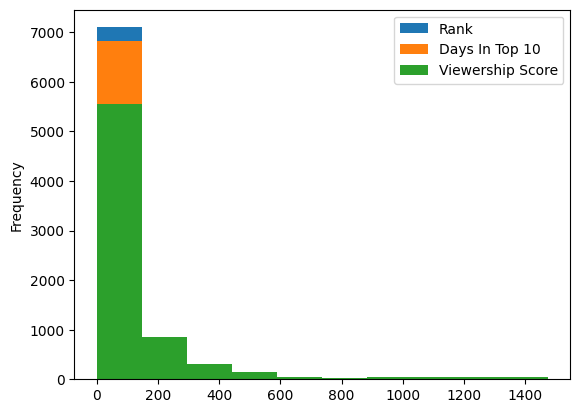

In [11]:
df.plot.box()
df.plot.hist()

<Axes: ylabel='Frequency'>

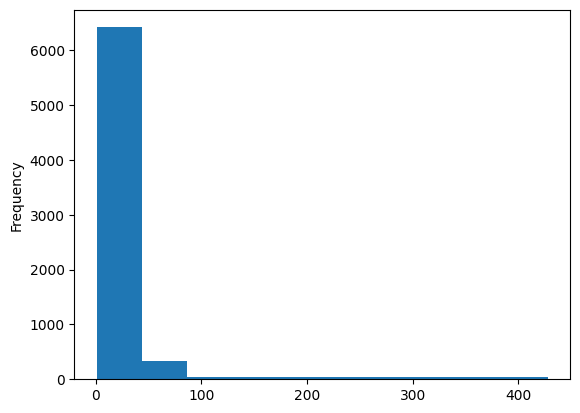

In [12]:
df['Days In Top 10'].plot.hist()

<Axes: ylabel='Frequency'>

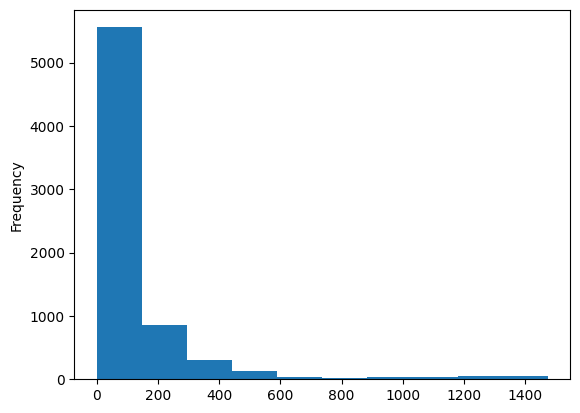

In [13]:
df['Viewership Score'].plot.hist()

In [14]:
# Método de Tukey - IQR (Distribuição não normal)
# Calcular o IQR
Q1 = df['Days In Top 10'].quantile(0.25)
Q3 = df['Days In Top 10'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
# Identificar outliers
outliers_inferior = df[df['Days In Top 10'] < Q1 - 1.5 * IQR]
outliers_superior = df[df['Days In Top 10'] > Q3 + 1.5 * IQR]
print(outliers_inferior)
print(outliers_superior)

3.0 18.0 15.0
Empty DataFrame
Columns: [As of, Rank, Year to Date Rank, Last Week Rank, Title, Type, Netflix Exclusive, Netflix Release Date, Days In Top 10, Viewership Score]
Index: []
           As of  Rank Year to Date Rank Last Week Rank          Title  \
438   2020-05-14     9                 9              -          Ozark   
447   2020-05-15     8                 9             10          Ozark   
458   2020-05-16     9                 8              -          Ozark   
489   2020-05-19    10                 -              7          Ozark   
629   2020-06-02    10                 -              -    Outer Banks   
...          ...   ...               ...            ...            ...   
7053  2022-03-07     4                 3              4  Love is Blind   
7063  2022-03-08     4                 4              4  Love is Blind   
7074  2022-03-09     5                 4              5  Love is Blind   
7085  2022-03-10     6                 5              5  Love is Blind   


In [15]:
# Método de Tukey - IQR (Distribuição não normal)
# Calcular o IQR
Q1 = df['Viewership Score'].quantile(0.25)
Q3 = df['Viewership Score'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
# Identificar outliers
outliers_inferior = df[df['Viewership Score'] < Q1 - 1.5 * IQR]
outliers_superior = df[df['Viewership Score'] > Q3 + 1.5 * IQR]
print(outliers_inferior)
print(outliers_superior)

19.0 128.0 109.0
Empty DataFrame
Columns: [As of, Rank, Year to Date Rank, Last Week Rank, Title, Type, Netflix Exclusive, Netflix Release Date, Days In Top 10, Viewership Score]
Index: []
           As of  Rank Year to Date Rank Last Week Rank  \
236   2020-04-24     7                 7              2   
247   2020-04-25     8                 7              2   
255   2020-04-26     6                 8              3   
269   2020-04-27    10                 6              4   
2382  2020-11-25     3                 2              3   
...          ...   ...               ...            ...   
7008  2022-03-02     9                 6              3   
7063  2022-03-08     4                 4              4   
7074  2022-03-09     5                 4              5   
7085  2022-03-10     6                 5              5   
7094  2022-03-11     5                 6              6   

                             Title     Type Netflix Exclusive  \
236   Tiger King: Murder, Mayhem …  T

In [17]:
sv_churn_report = sv.analyze(df, target_feat='Viewership Score')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [18]:
sv_churn_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
